<a href="https://colab.research.google.com/github/baruchais/forestpaths-workshop/blob/main/Decision_Tree_and_Random_Forest_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to the Decision Tree and Random Forest workshop!

In the ForestPaths workshop, participants will dive deep into the world of machine learning, exploring the intricacies of decision trees and random forests through hands-on sessions. Utilizing popular Python libraries such as Scikit-learn for model building and Matplotlib for data visualization, attendees will gain practical experience in implementing these algorithms. This interactive workshop is designed to equip learners with the skills to harness the predictive power of decision trees and random forests, making complex data analysis more accessible and engaging. Presented by the Data Science committee from AIS.

We will be focusing on 2 supervised learning algorithms: decision trees and random forest

# Reminder:

*  Supervised has label(aka Y value)
*   Unsupervised: No label(no Y)


In [ ]:
#importing libraries

# Pandas and numpy for eda and cleaning
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import our Random Forest
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

Introducing: Decision Trees

Dataset:https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download


In [ ]:
#First we need to understand what is in out dataset
#loading in dataset
df=pd.read_csv("/content/mushrooms.csv")
#checking the first 10 values
df.head(10)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


Kaggle states these are the attributes:

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
# I want to see early on what data types we are working with
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

<Axes: xlabel='class', ylabel='Count'>

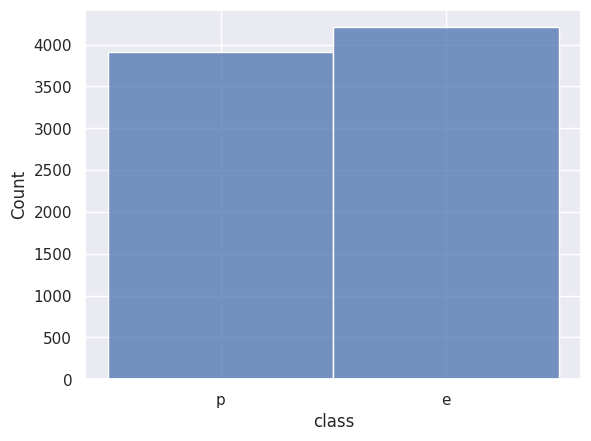

In [ ]:
sns.histplot(df['class'])

**Before Modeling, there is also one more important but fun step: Feature Engineering**

Basically when you decide on features, aka columns, to keep or remove from the data. Some reasons why it is dropped or removed

*   Usally done when the feature is not correlated at all
*  There is multicollinarity
*   To many null values that can't be substitued by 0 or other statistical mean

The point is to speed up process and enchance accuracy




#What is multicollinearity?
What is multicollinearity and why is it important?
Multicollinearity is when two independent variables are correlated to one another. This becomes an issue because our independent variable will not be as statistically significant as it is. Thus, it can make our model less reliable.




So, to check for multicollinearity I need to find the VIF score
VIF stands for variance inflation factor. It measures the correlation between independent factors.


For all our stats people it looks like this:
VIF=1/1-R^2


Usually, a VIF above 5 indicates that there is multicollinearity


#Starting Modeling
In statitics, we usually have a line that looks something like this: y=mx+b.

Y is our dependent variable, x our independent variable,m the slope, and b the intercept.

We have the same thing here. Except, here we have multiple independent variables, so it will something like this: y=mx1+mx2+mx3+...+mxn+b

In [ ]:
#Here we need to change our categorical to variables to numerical
#first we will seperate to X and Y variables
X = df.drop(['class'],axis=1)
y = df['class']

X can be encoded using pandas dummy variable and y using LabelEncoder.

Dummy variable creates a sep. column for each unique value of the column. LabelEncoder encodes target labels with value between 0 and classes-1. We only have two classes that we are trying to predict so it will be 0 and 1. We want to keep the class feature together.

# Rule you can follow to decide:
One hot encoding is better for features that aren't ordered but label encoding is better for those that have some kind of order



In [ ]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#doesn't deal well with high uniqness in feature; can start to overfit
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)


[1 0 0 ... 0 1 0]


Now that we have our variables, we need to split up our data even further into training and testing sets.

The training set is what our data will be trained on. It will use this data to create the model.

The testing set is what we will test ourn data on. We need to see how well this data will generalize to unseen data. (Will show how accurate it actually is)

In [ ]:
#Creating the training and testing sets
#Test size is how much of the data we want to save to test.
#Random state basically randomizes how we split our data, so it will help us reproduce the same data to test and train on later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

**Let's create the actual model!**

In [ ]:
#1. Creating the LinearRegression model object and assign to variable 'dt_model'
dt_model = DecisionTreeClassifier()

# 2. Fitting the model to the training data below(chosing m and b)
dt_model.fit(X_train, y_train)

# 3. Calling predict() to make predictions on the test data
dt_pred = dt_model.predict(X_test)

# 4: Evaluating the metrics
accuracy = accuracy_score(y_true=y_test, y_pred=dt_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=dt_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=dt_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=dt_pred)
print('F1 Score: %f' % f1)


Accuracy Score: 1.000000
Precision Score: 1.000000
Recall Score: 1.000000
F1 Score: 1.000000


#What are all these metrics??

*   Accuracy: “Out of all the predictions we made, how many were true?”
*   Precision: “Out of all the positive predictions we made, how many were true?”
*   Recall: “Out of all the data points that should be predicted as true, how many did we correctly predict as true?”
*   F1 Score: F1 Score is a measure that combines recall and precision. As we have seen there is a trade-off between precision and recall, F1 can therefore be used to measure how effectively our models make that trade-off.

*   source: https://www.labelf.ai/blog/



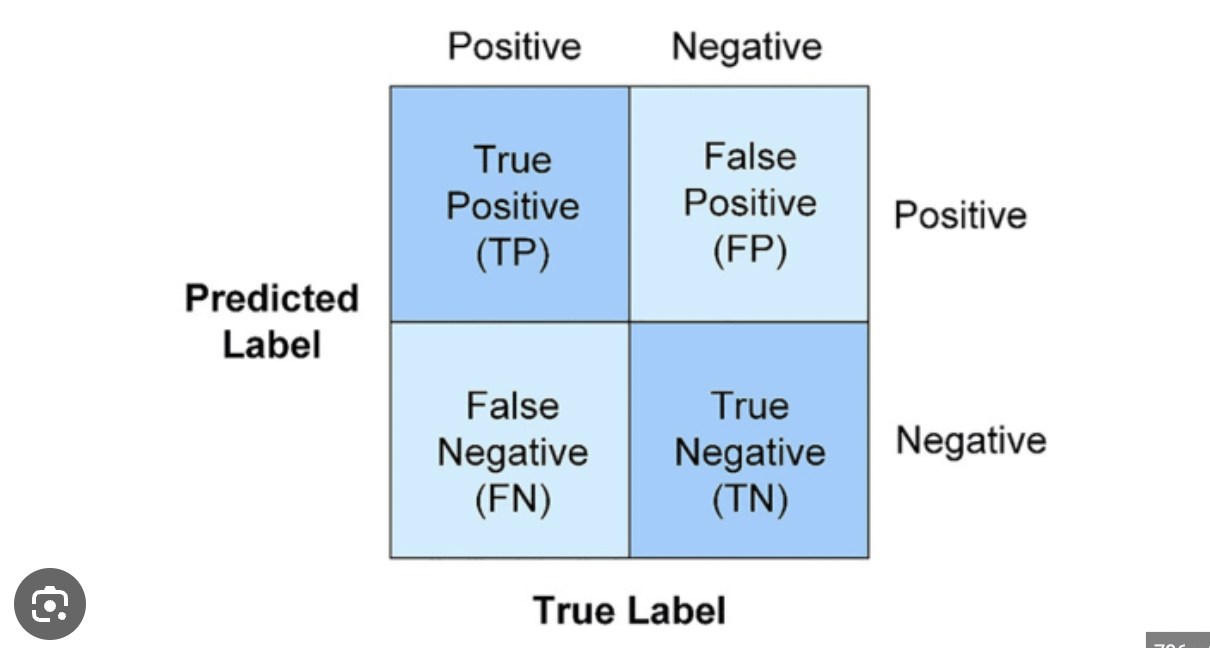

Accuracy score only works for classification.

Does anyone notice anything about our result?

#ITS OVERFITTING

#Decision Tree Parameters
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)

To fix overfitting, we need to tune the parameters. AKA hyperparameter tuning

In [ ]:
#can do grid search or random search
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini', 'entropy'),
              'max_depth':[2,3,4,5],
              'class_weight':('balanced', None),
             }
gsearch = GridSearchCV(dt_model, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5)

In [ ]:
#1. Creating the LinearRegression model object and assign to variable 'dt_model'
dt_model = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=0)

# 2. Fitting the model to the training data below(chosing m and b)
dt_model.fit(X_train, y_train)

# 3. Calling predict() to make predictions on the test data
dt_pred = dt_model.predict(X_test)

# 4: Evaluating the metrics
accuracy = accuracy_score(y_true=y_test, y_pred=dt_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=dt_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=dt_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=dt_pred)
print('F1 Score: %f' % f1)

Accuracy Score: 0.999590
Precision Score: 1.000000
Recall Score: 0.999142
F1 Score: 0.999571


In [ ]:
#1. Creating the LinearRegression model object and assign to variable 'dt_model'
dt_model = DecisionTreeClassifier(criterion='gini',random_state = 0 , max_depth = 3)

# 2. Fitting the model to the training data below(chosing m and b)
dt_model.fit(X_train, y_train)

# 3. Calling predict() to make predictions on the test data
dt_pred = dt_model.predict(X_test)

# 4: Evaluating the metrics
accuracy = accuracy_score(y_true=y_test, y_pred=dt_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=dt_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=dt_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=dt_pred)
print('F1 Score: %f' % f1)

Accuracy Score: 0.983593
Precision Score: 0.968386
Recall Score: 0.998285
F1 Score: 0.983108


We can also leave out a valadation set to test the data on to see if it generalizes it well

Still overfitting but it's an improvment. However, decision trees are prone to overfitting. Thats why we use random forest, which are a bunch of decision trees averaged into one. Random forest reduces overfitting.

Let's start of with Random Forest!

Looking at our columns, what do you think we should do next?

In [ ]:
#Creating the training and testing sets
#Test size is how much of the data we want to save to test.
#Random state basically randomizes how we split our data, so it will help us reproduce the same data to test and train on later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

In [ ]:
#1. Creating the LinearRegression model object and assign to variable 'rf_model'
rf_model = RandomForestClassifier(max_depth = 3)

# 2. Fitting the model to the training data below(chosing m and b)
rf_model.fit(X_train, y_train)

# 3. Calling predict() to make predictions on the test data
rf_pred = rf_model.predict(X_test)

# 4: Evaluating the metrics
accuracy = accuracy_score(y_true=y_test, y_pred=rf_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=rf_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=rf_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=rf_pred)
print('F1 Score: %f' % f1)

Accuracy Score: 0.990566
Precision Score: 1.000000
Recall Score: 0.980274
F1 Score: 0.990039


RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

In [ ]:
#1. Creating the LinearRegression model object and assign to variable 'rf_model'
rf_model = RandomForestClassifier(max_depth = 3)

# 2. Fitting the model to the training data below(chosing m and b)
rf_model.fit(X_train, y_train)

# 3. Calling predict() to make predictions on the test data
rf_pred = rf_model.predict(X_test)

# 4: Evaluating the metrics
accuracy = accuracy_score(y_true=y_test, y_pred=rf_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=rf_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=rf_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=rf_pred)
print('F1 Score: %f' % f1)

Accuracy Score: 0.977851
Precision Score: 1.000000
Recall Score: 0.953688
F1 Score: 0.976295


In [ ]:
#can do grid search or random search
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini', 'entropy'),
              'max_depth':[2,3,4,5],
              'class_weight':('balanced', None),
             }
gsearch = GridSearchCV(rf_model, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
model

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5)

In [ ]:
#1. Creating the LinearRegression model object and assign to variable 'rf_model'
rf_model = RandomForestClassifier(max_depth = 3)

# 2. Fitting the model to the training data below(chosing m and b)
rf_model.fit(X_train, y_train)

# 3. Calling predict() to make predictions on the test data
rf_pred = rf_model.predict(X_test)

# 4: Evaluating the metrics
accuracy = accuracy_score(y_true=y_test, y_pred=rf_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=rf_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=rf_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=rf_pred)
print('F1 Score: %f' % f1)

More topics to explore for decision trees: Pruning, information gain, entropy, CART, gini index

How does the Decision Tree split criteria?

There are 2 ways that it can do this:
(Note in our code we tried both and chose the best one)
- Entropy and Information Gain
- Gini Index

Entropy and Information Gain

Entropy is the way to measure the randomness of a particular variable. In the context of Decision trees, it shows how impure a node is after a split. Typically, it ranges from 0 to 1 where 0 is pure and 1 is impure. The DecisionTreeClassifier finds a tree that has the least possible entropy for each node. To find this it looks at the information gained as it is splitting. Information Gain is the reduction of entropy from the parent node to the child node. Think of it as a program that tries potential combinations of splits until it finds the one with the most information gain. The one with the most information gained at the end is our best tree.

Equation:  
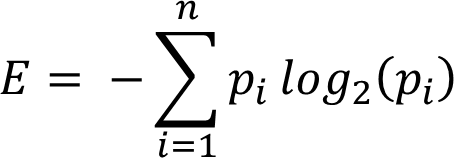



Gini Index (aka Gini Impurity)

The Gini Index uses a different to calculate the “randomness” in a node. It measures the likelihood of misclassification. Instead of using a logarithmic scale, it uses a quadratic scale. This means it often runs quicker. Similar to the entropy it uses the weighted average to find the total Gini Index. In the context of decision trees it applies this ratio find splits of each node.  

Equation:  

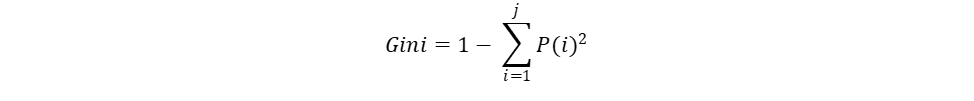


Generally, both strategies have very similar results.


Thank you everyone!!

Please let me know how i did: https://forms.gle/ZuEjsKGG7tZQTEvL8